In [25]:
import numpy as np
import matplotlib.pyplot as plt
# import numpy.fft as fft

In [26]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]

# s_vals = np.linspace(0.2, 20.0, 1001)
s_vals = np.linspace(1.0, 2.0, 101)
s_vals = s_vals[:-1]
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

In [27]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [28]:
alpha0 = 0.5
d0 = 2.0

In [29]:
u_test = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)

u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)


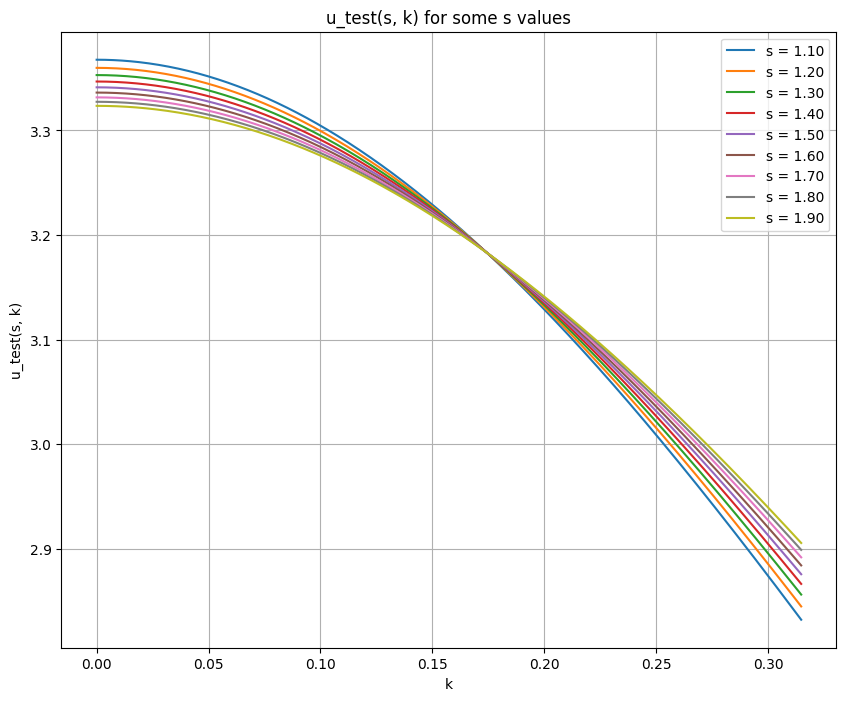

In [30]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [31]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(100, 500)


average difference for s = 1.02 : 0.013923338390798162


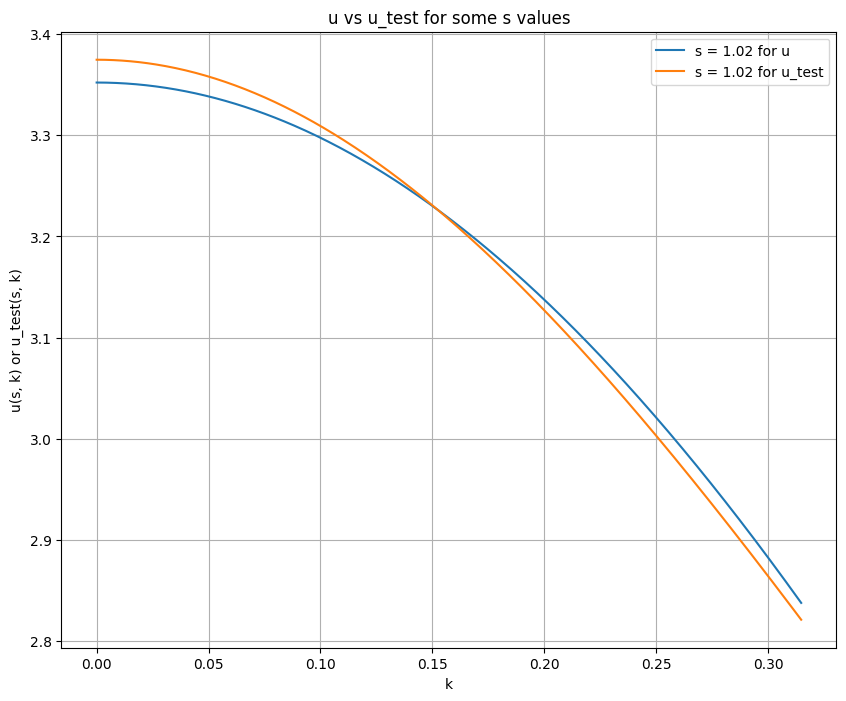

average difference for s = 1.04 : 0.01291826498543727


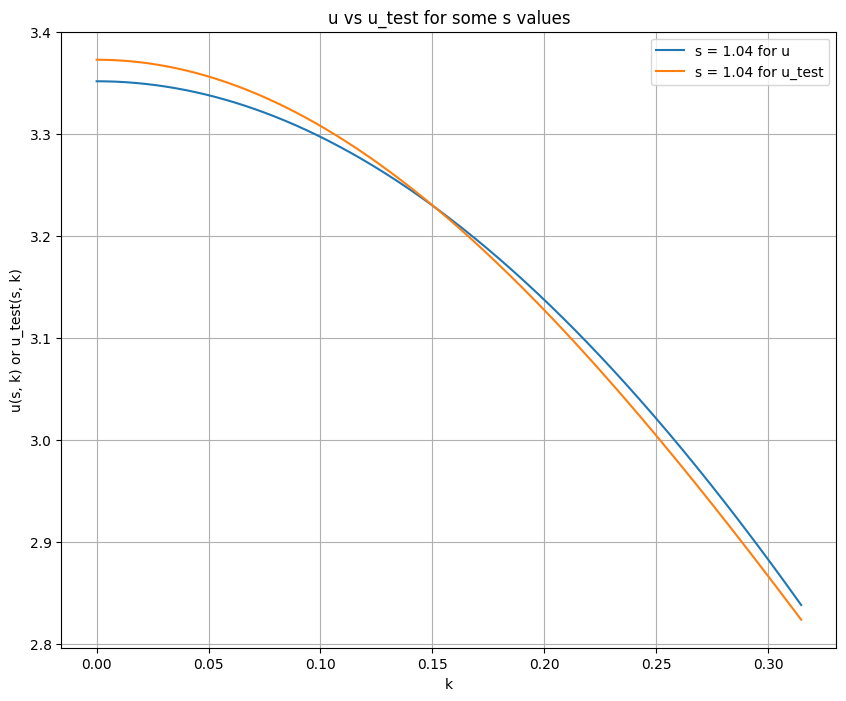

average difference for s = 1.06 : 0.01194724342721599


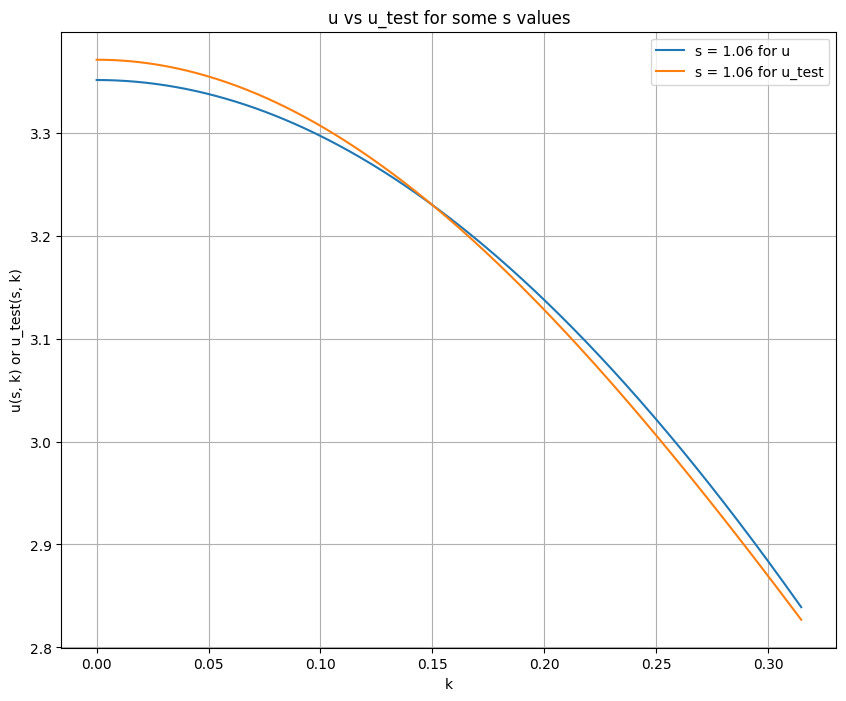

average difference for s = 1.08 : 0.011008911659376846


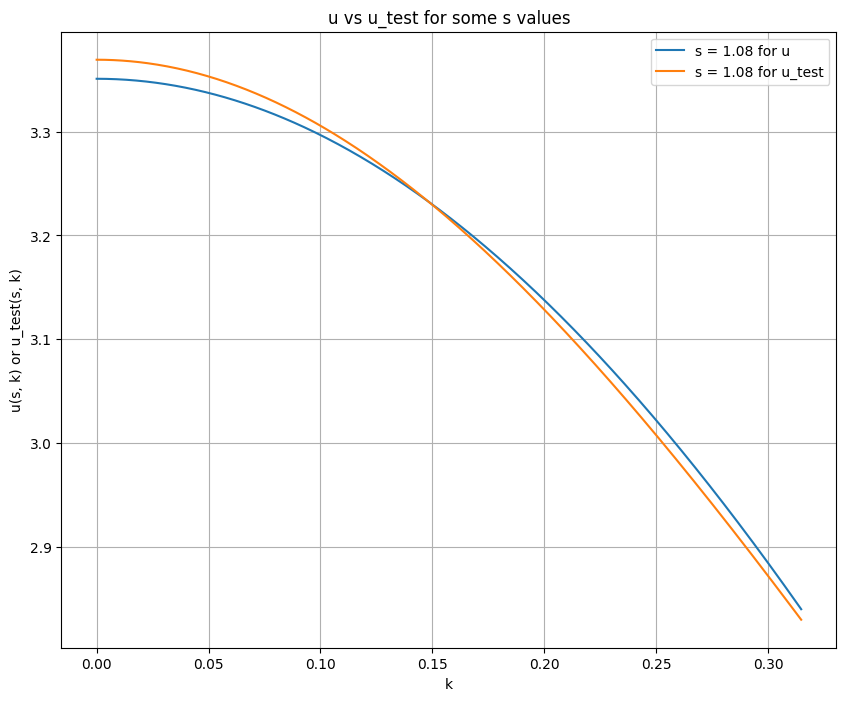

average difference for s = 1.10 : 0.010102252343352125


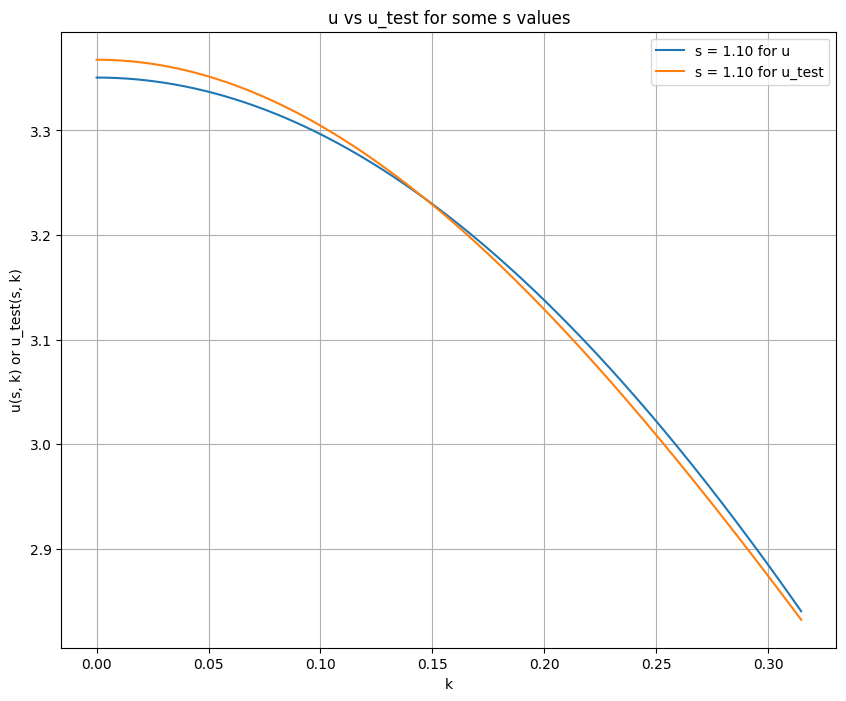

average difference for s = 1.12 : 0.009226151407386411


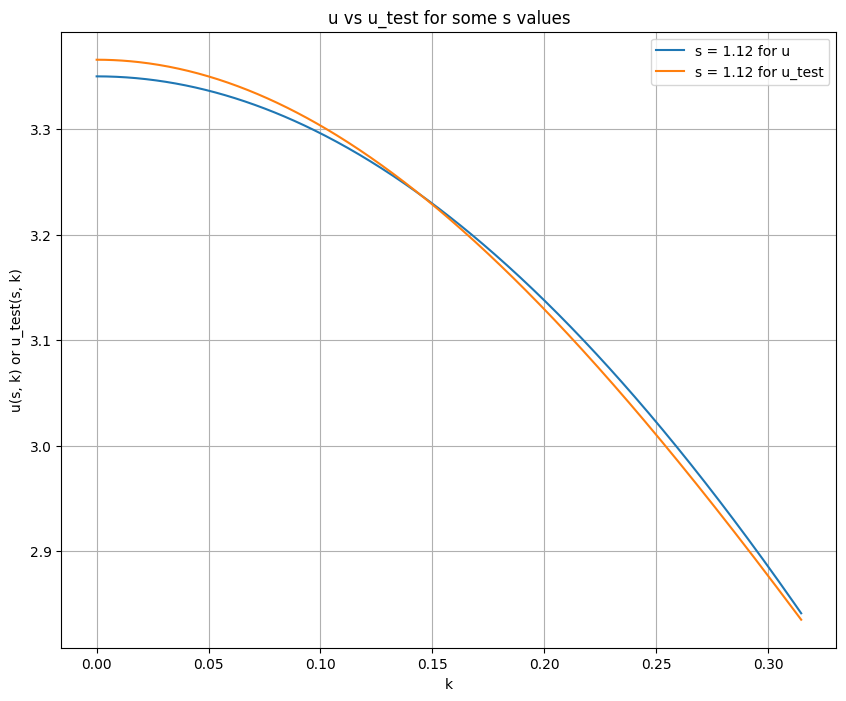

average difference for s = 1.14 : 0.008379811511240119


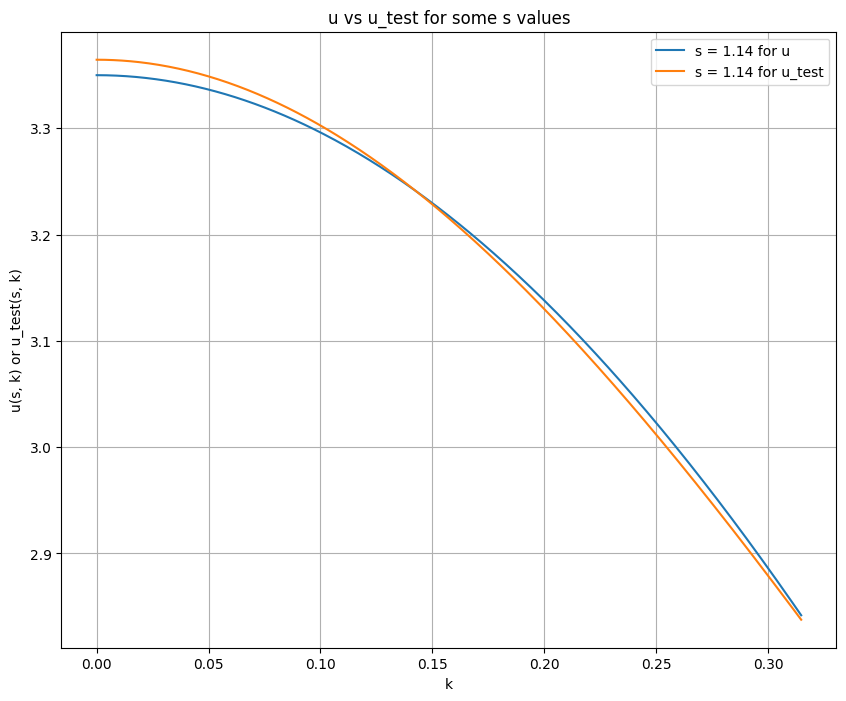

average difference for s = 1.16 : 0.007562653230940604


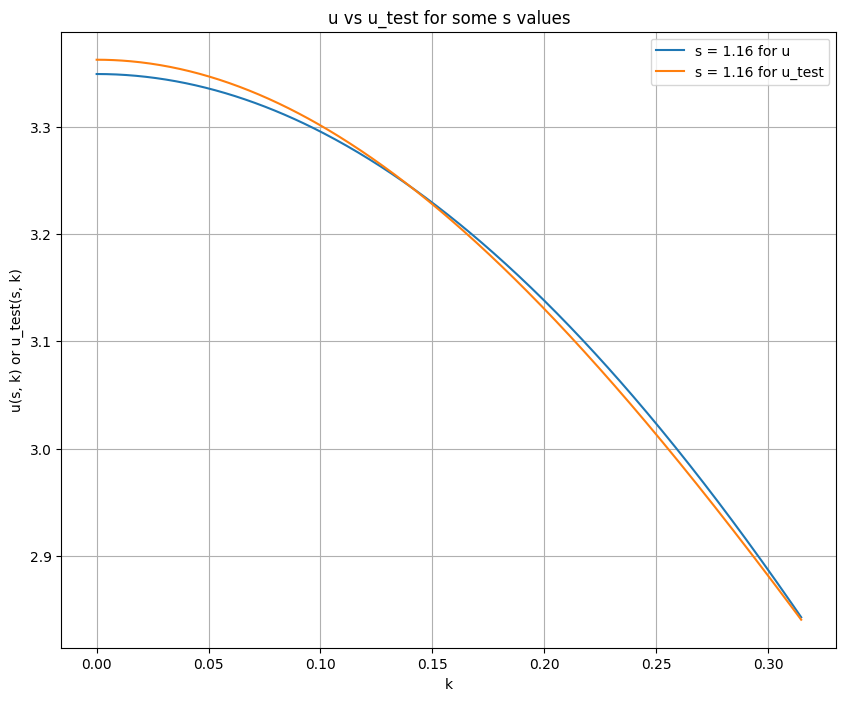

average difference for s = 1.18 : 0.006774196601432702


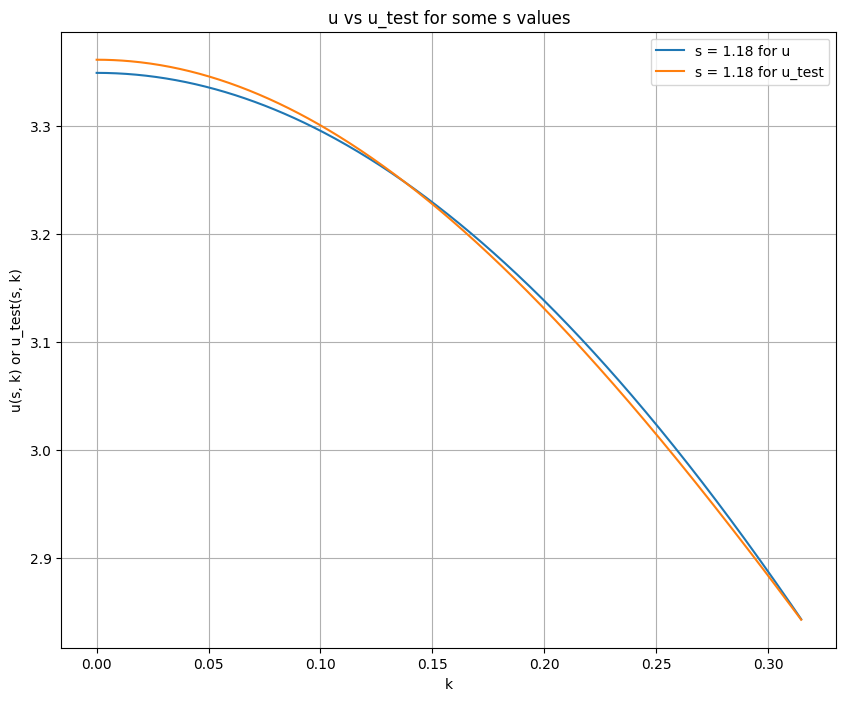

average difference for s = 1.20 : 0.0060371960828351865


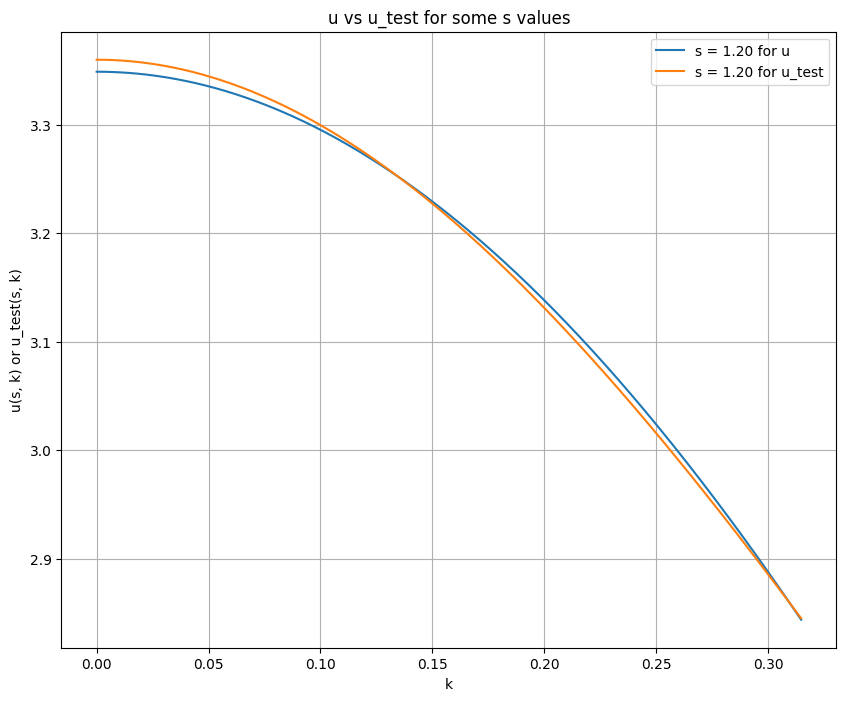

average difference for s = 1.22 : 0.005399636384752576


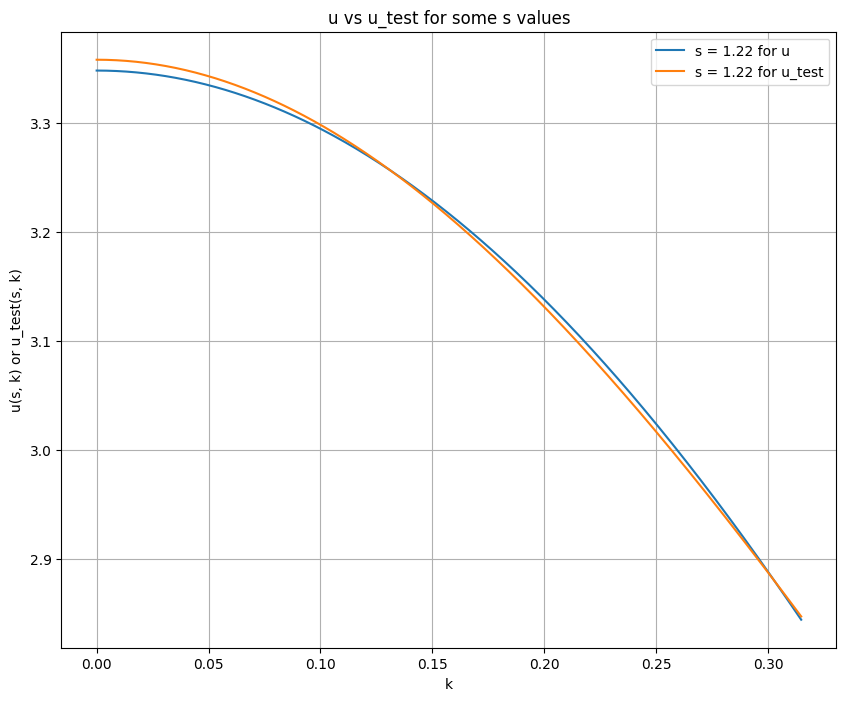

average difference for s = 1.24 : 0.004855988856203776


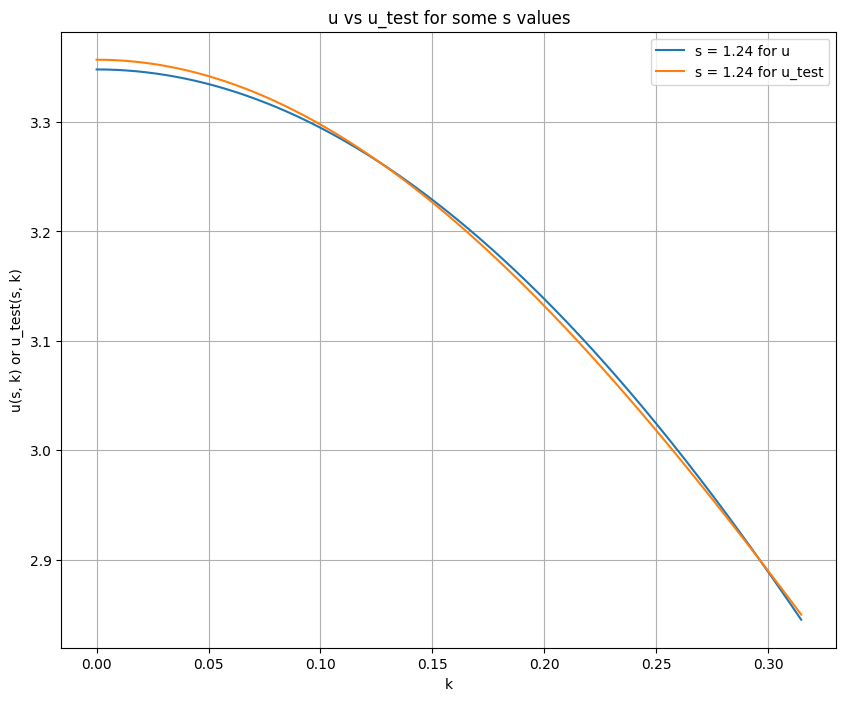

average difference for s = 1.26 : 0.004399514270312529


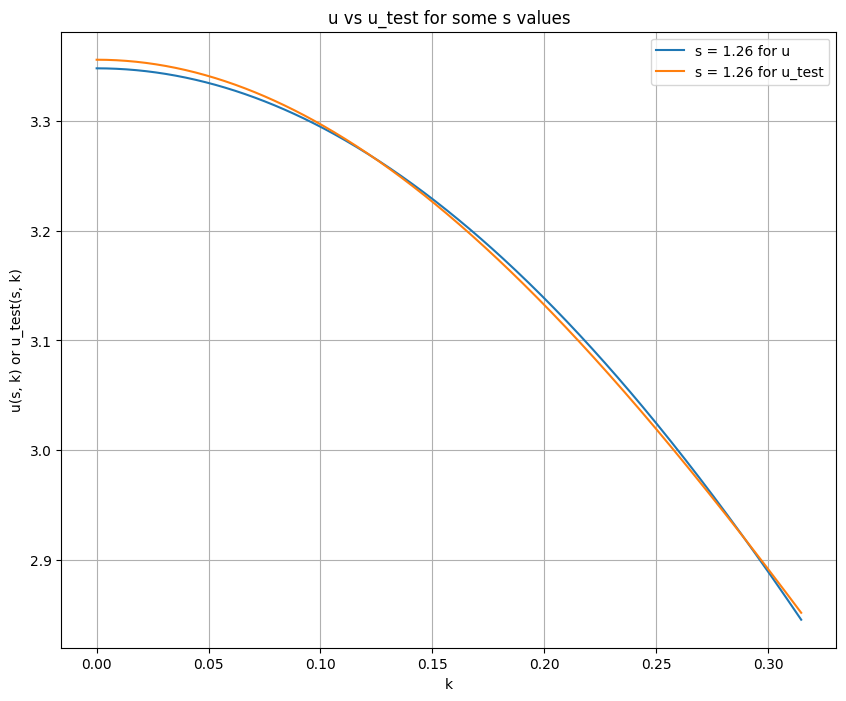

average difference for s = 1.28 : 0.004024445347966108


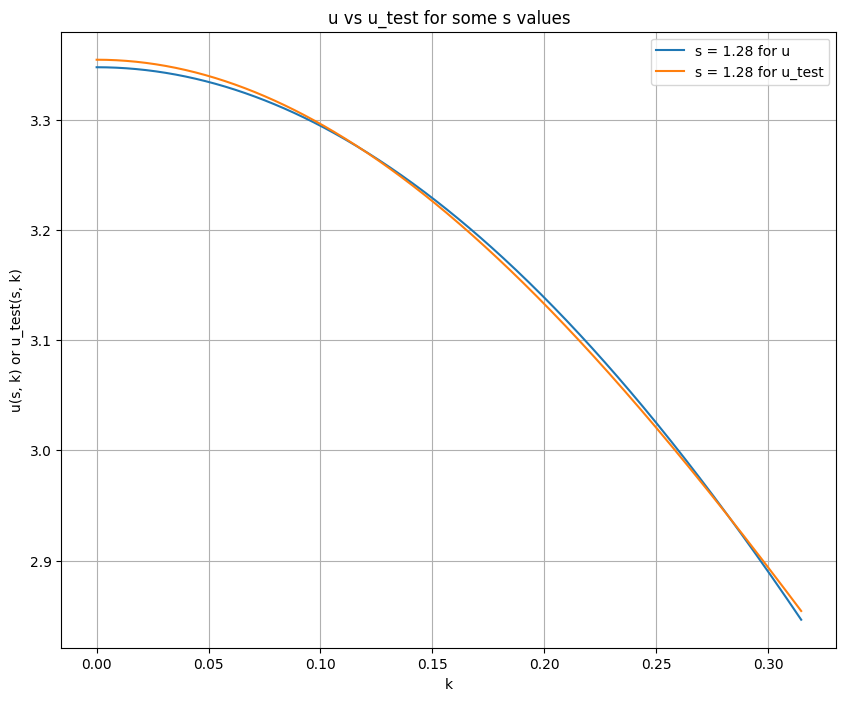

average difference for s = 1.30 : 0.0037262084624556813


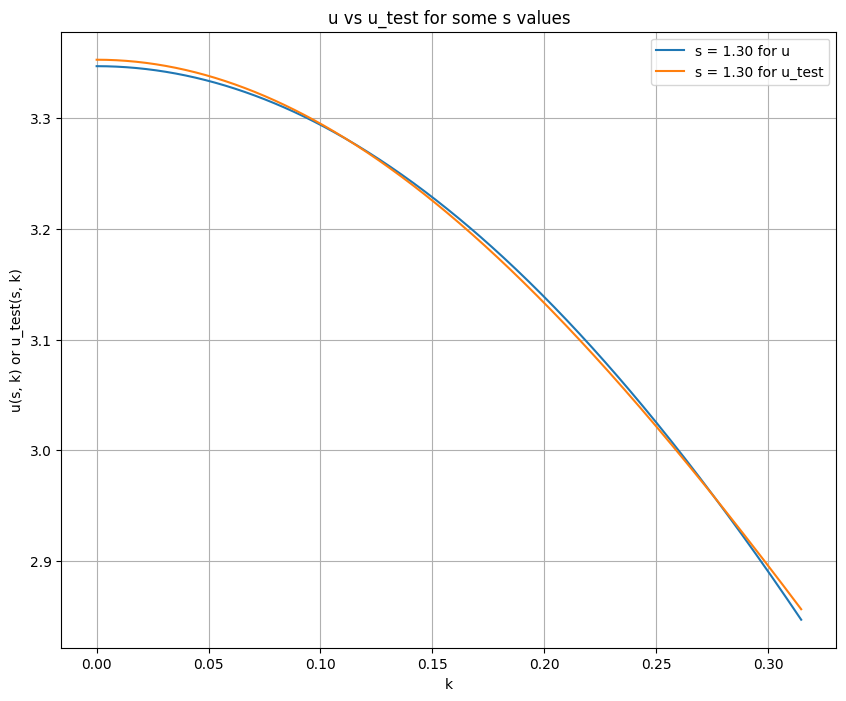

average difference for s = 1.32 : 0.0035015820061704687


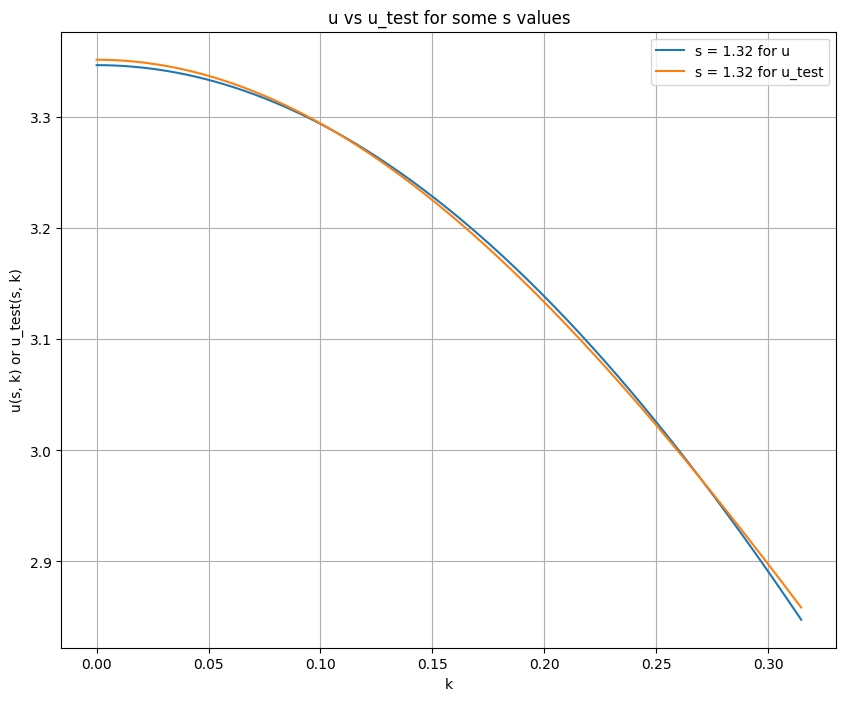

average difference for s = 1.34 : 0.0033489886263725977


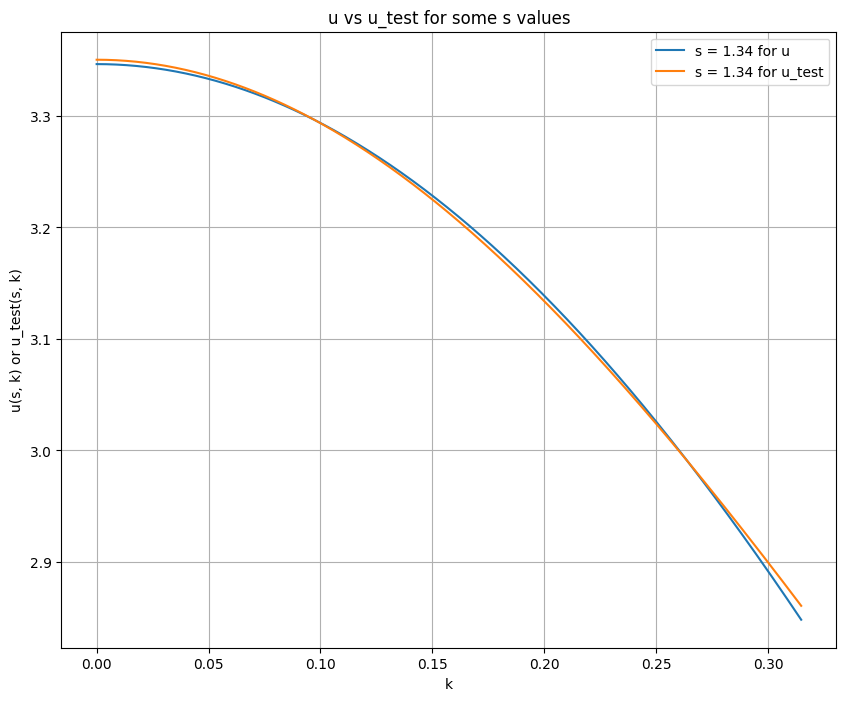

average difference for s = 1.36 : 0.0032692044949817305


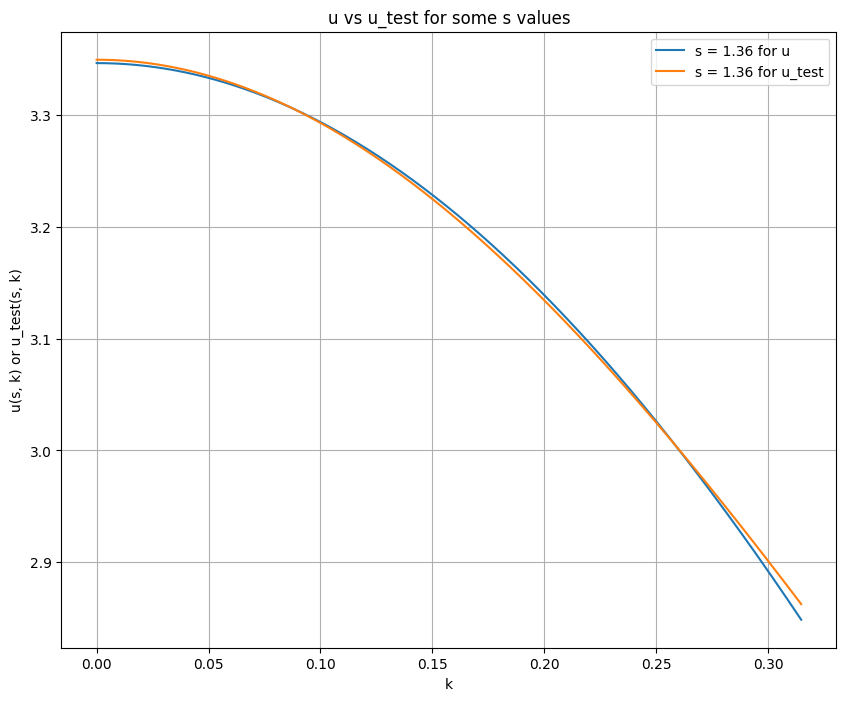

average difference for s = 1.38 : 0.0032666344072798683


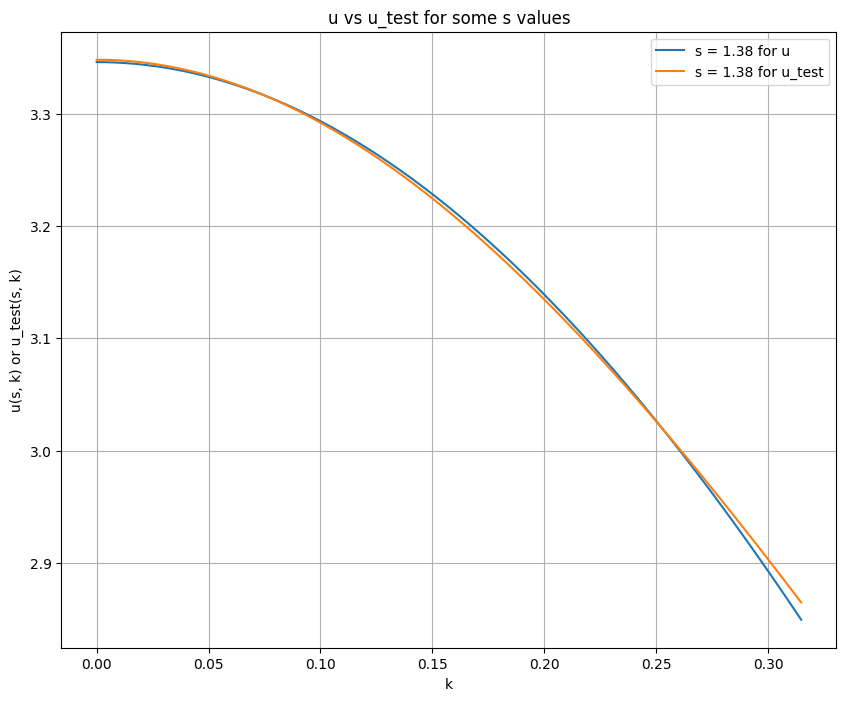

average difference for s = 1.40 : 0.0033519239498047736


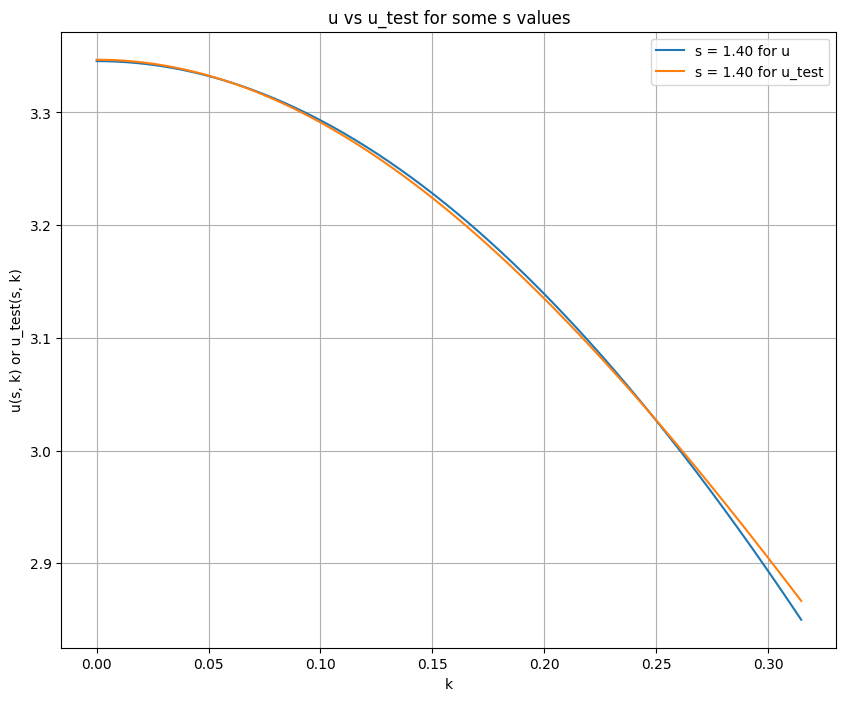

average difference for s = 1.42 : 0.0035512209153775913


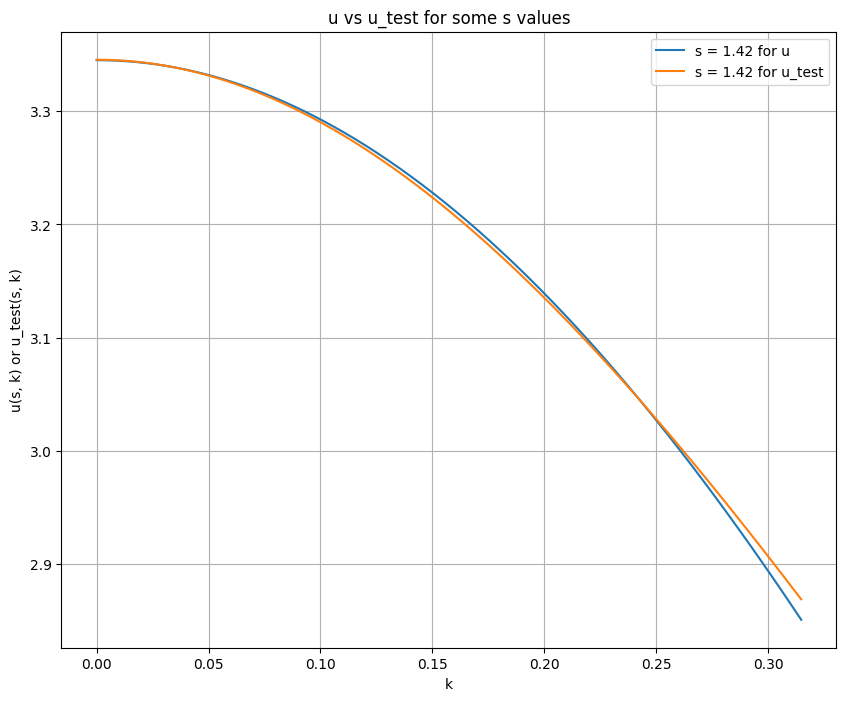

average difference for s = 1.44 : 0.003954944607884923


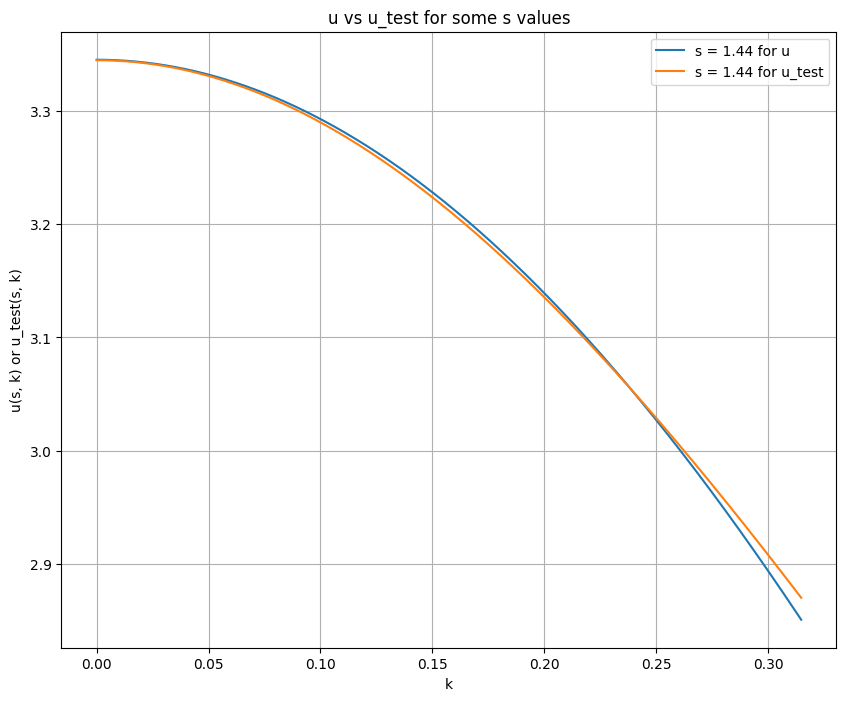

average difference for s = 1.46 : 0.00442249981816034


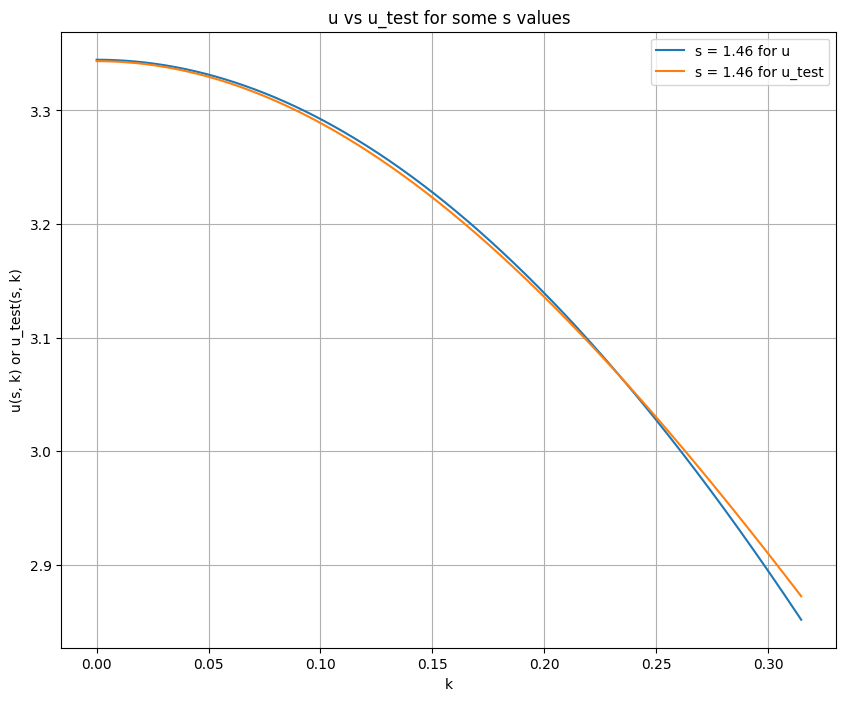

average difference for s = 1.48 : 0.0048934282142848486


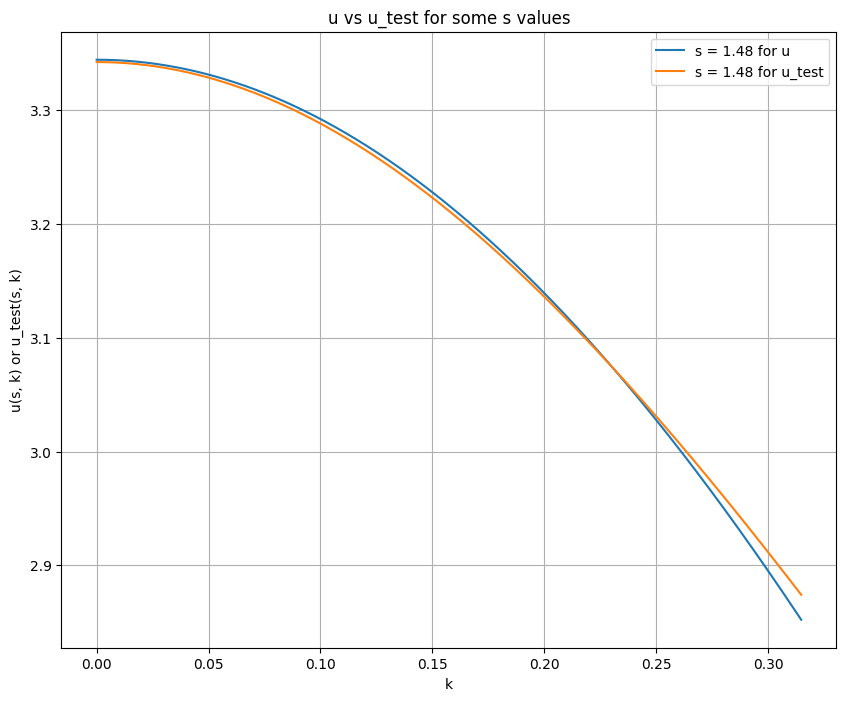

average difference for s = 1.50 : 0.005365624720920801


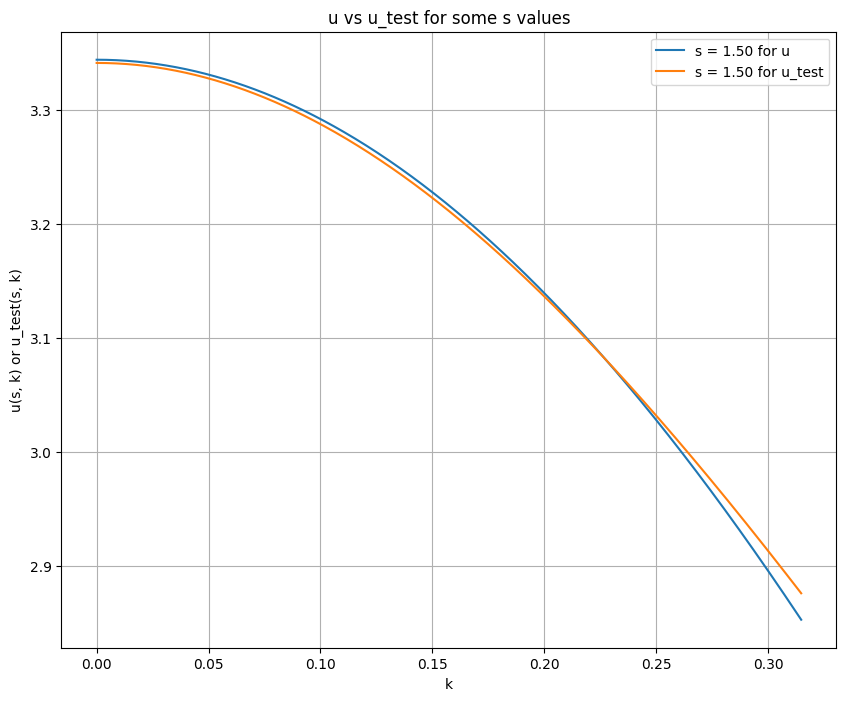

average difference for s = 1.52 : 0.00583740252367742


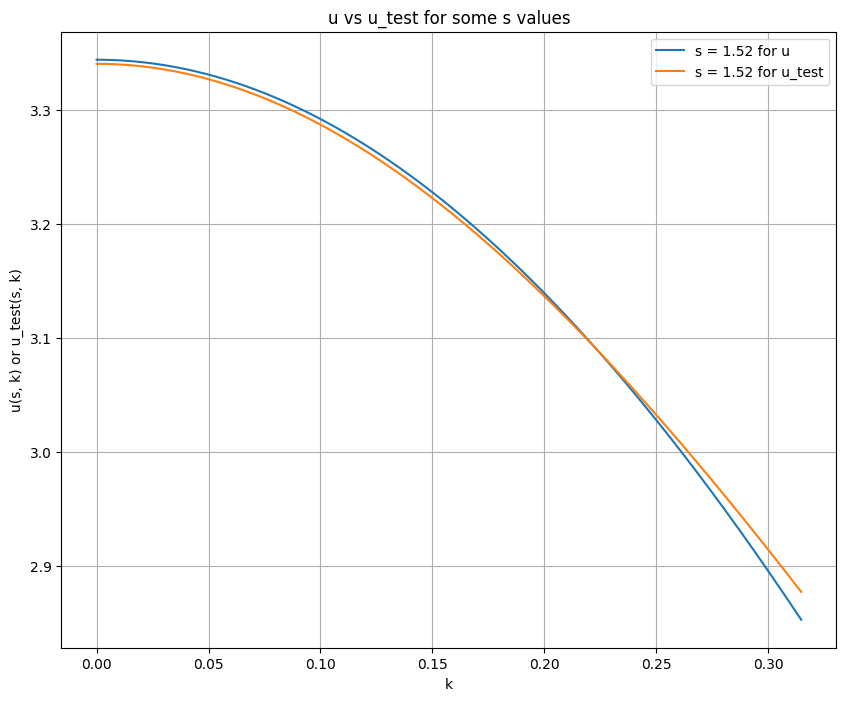

average difference for s = 1.54 : 0.006307334423205028


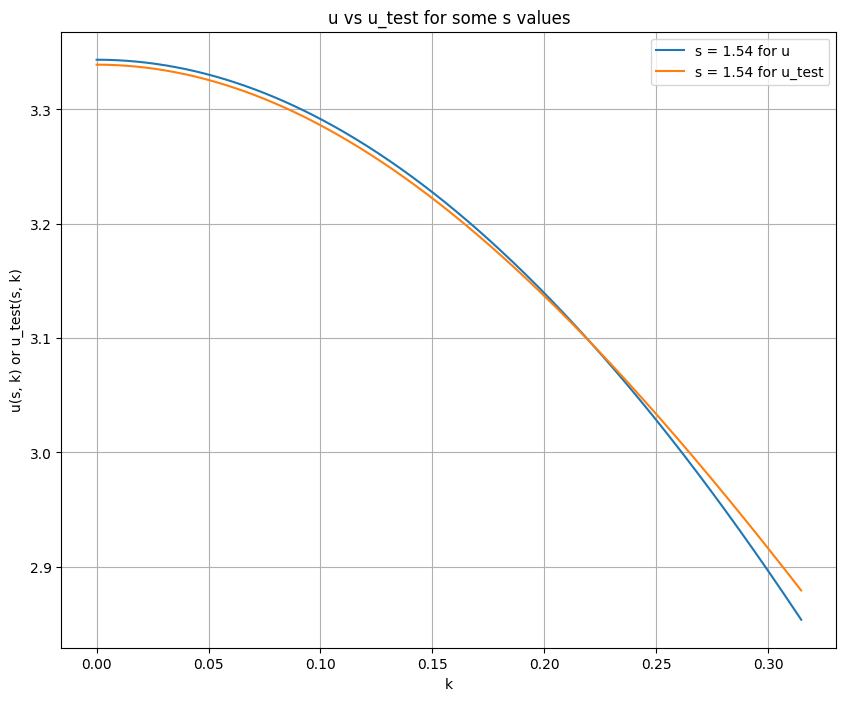

average difference for s = 1.56 : 0.006774242533791353


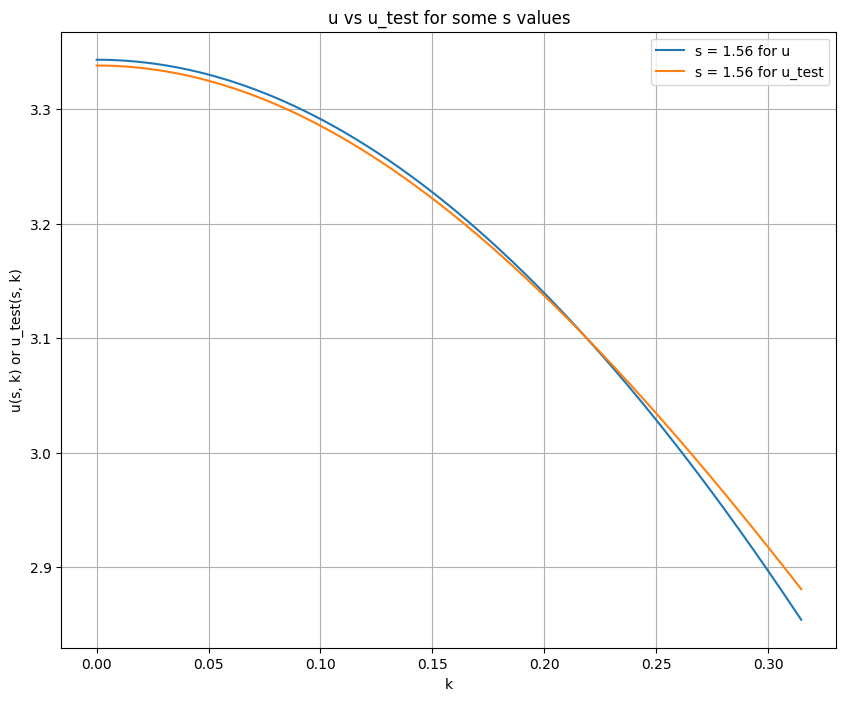

average difference for s = 1.58 : 0.0072373054028837735


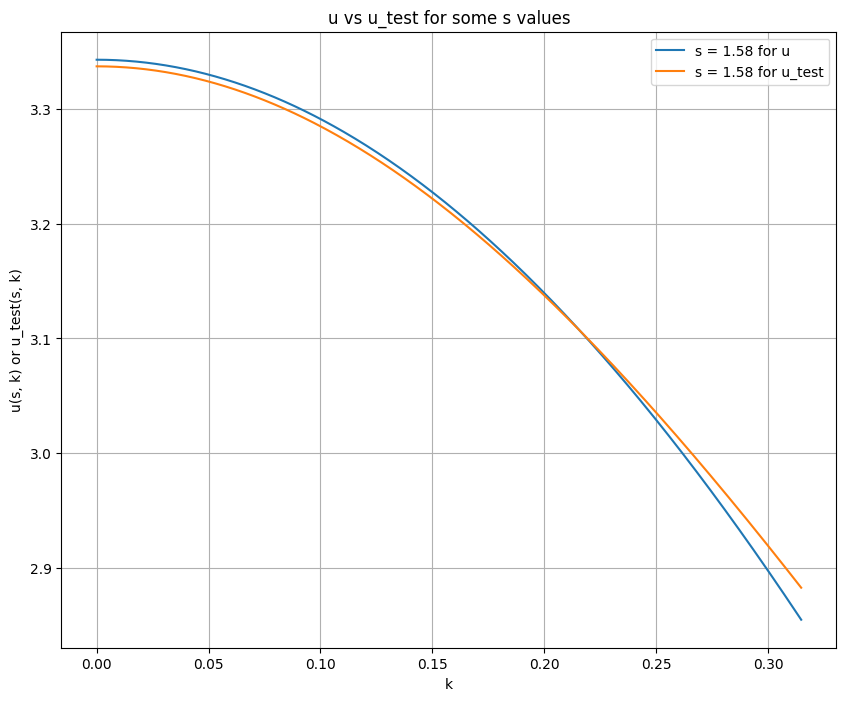

average difference for s = 1.60 : 0.007695742828727781


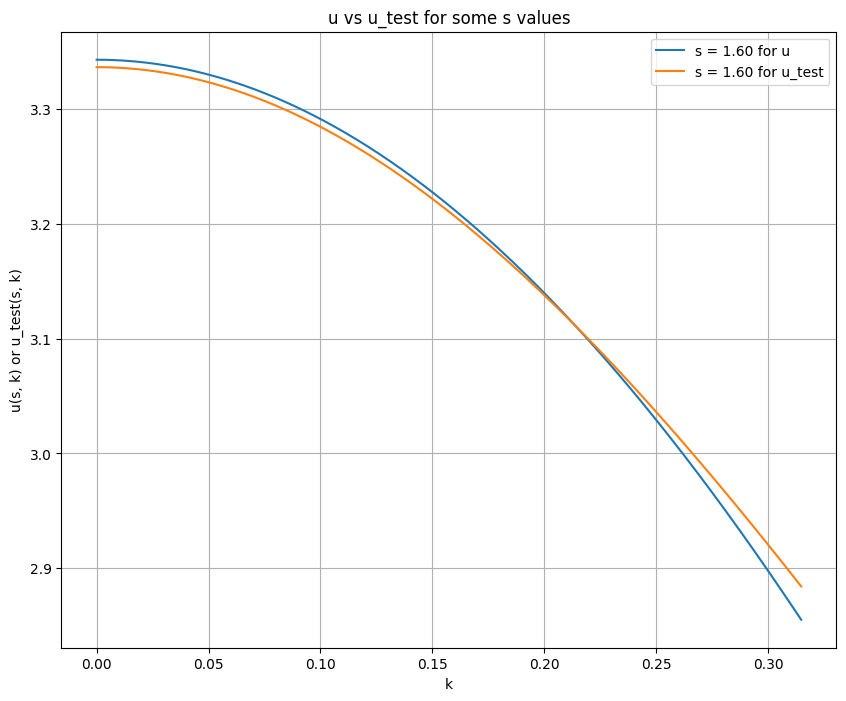

average difference for s = 1.62 : 0.008149137752935985


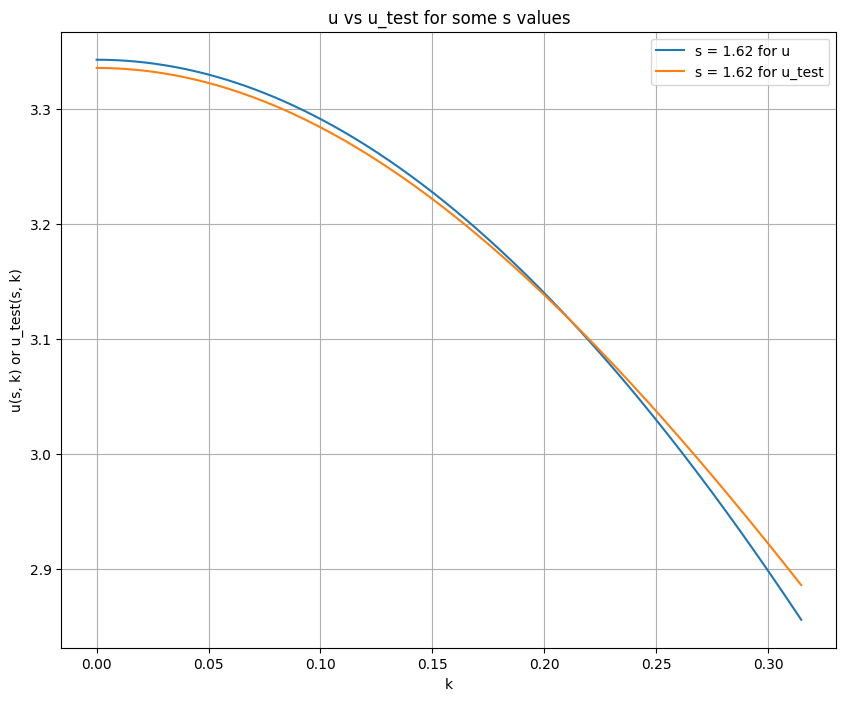

average difference for s = 1.64 : 0.008597001856696106


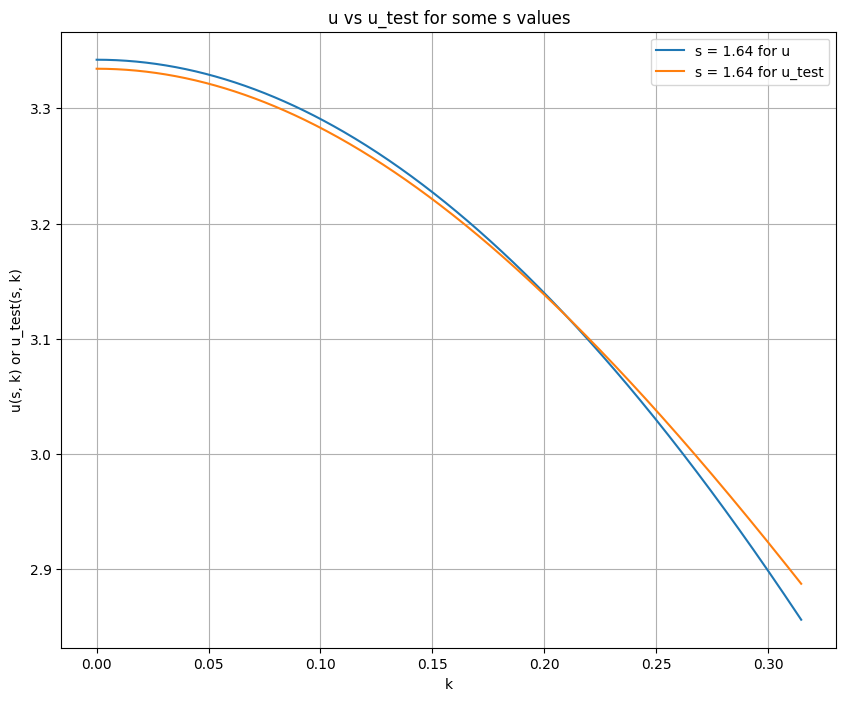

average difference for s = 1.66 : 0.009039160897230917


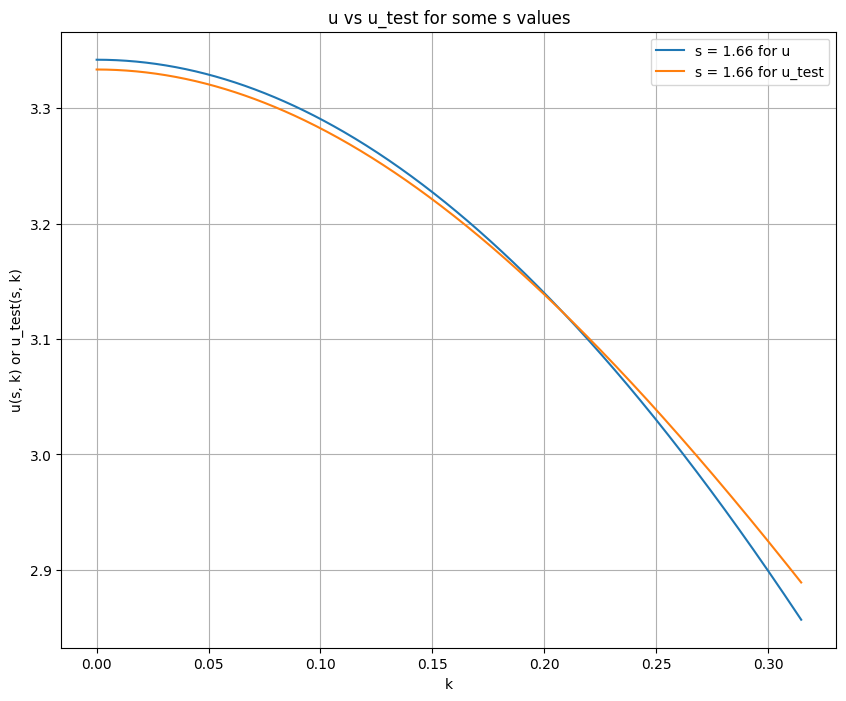

average difference for s = 1.68 : 0.009475260232533898


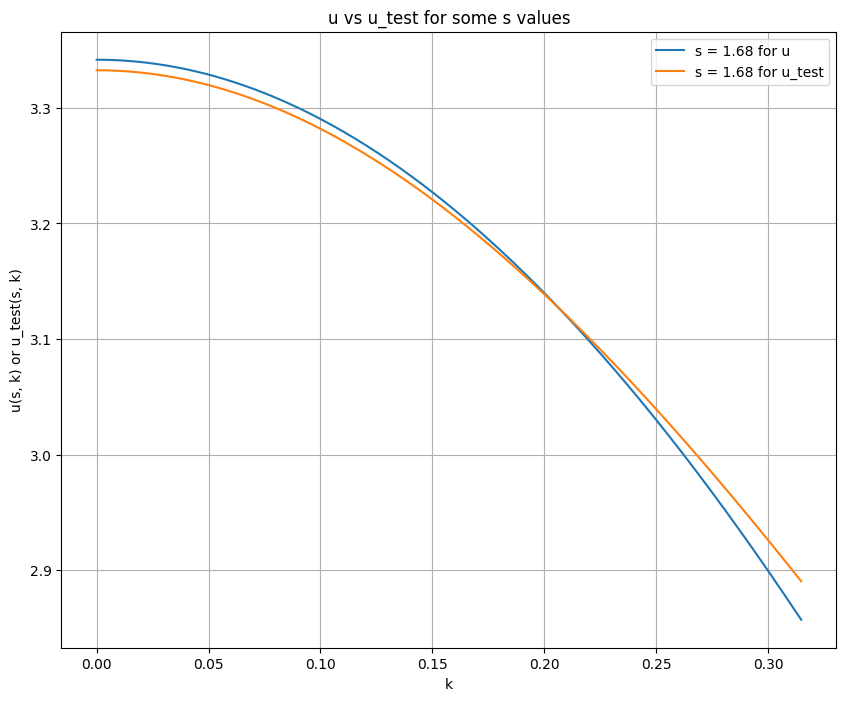

average difference for s = 1.70 : 0.009905292670164876


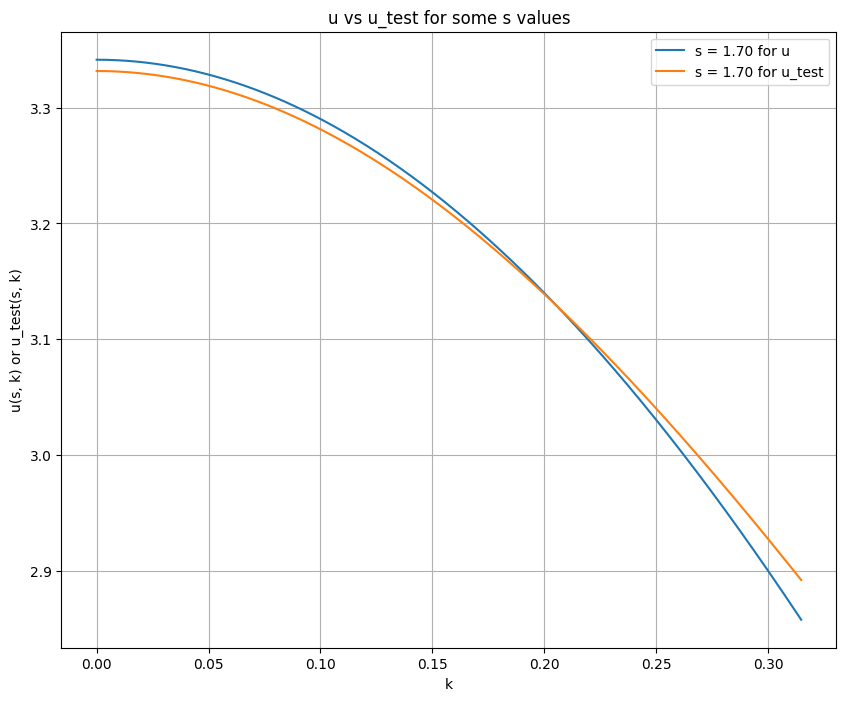

average difference for s = 1.72 : 0.01032913397957829


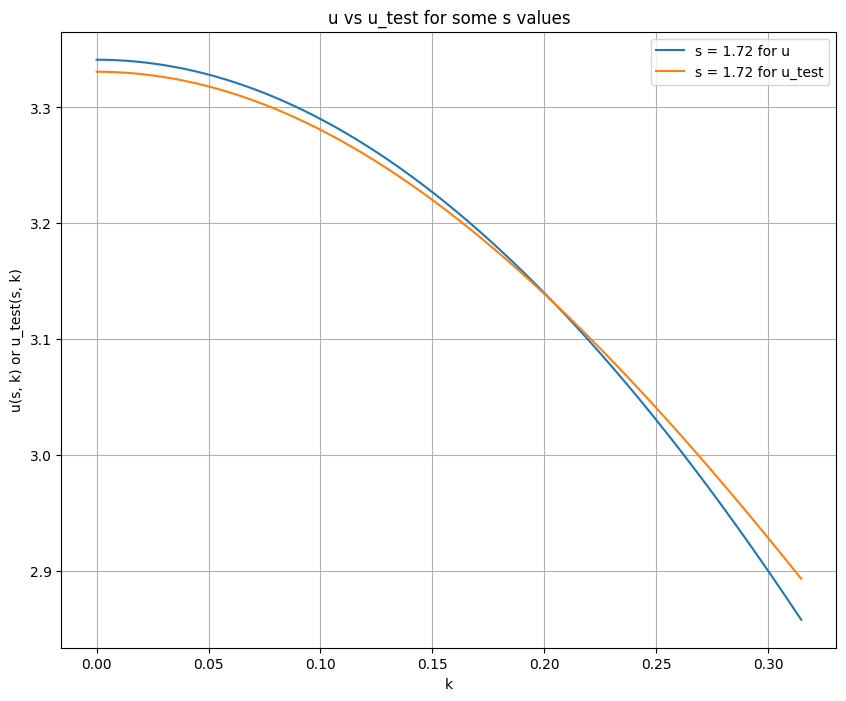

average difference for s = 1.74 : 0.010746770616826993


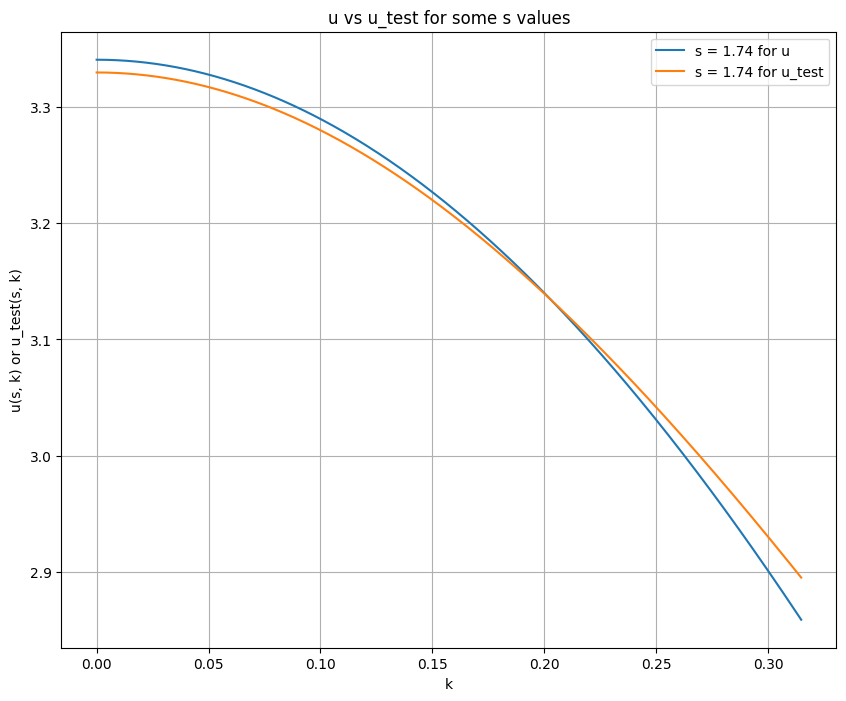

average difference for s = 1.76 : 0.011158216749897509


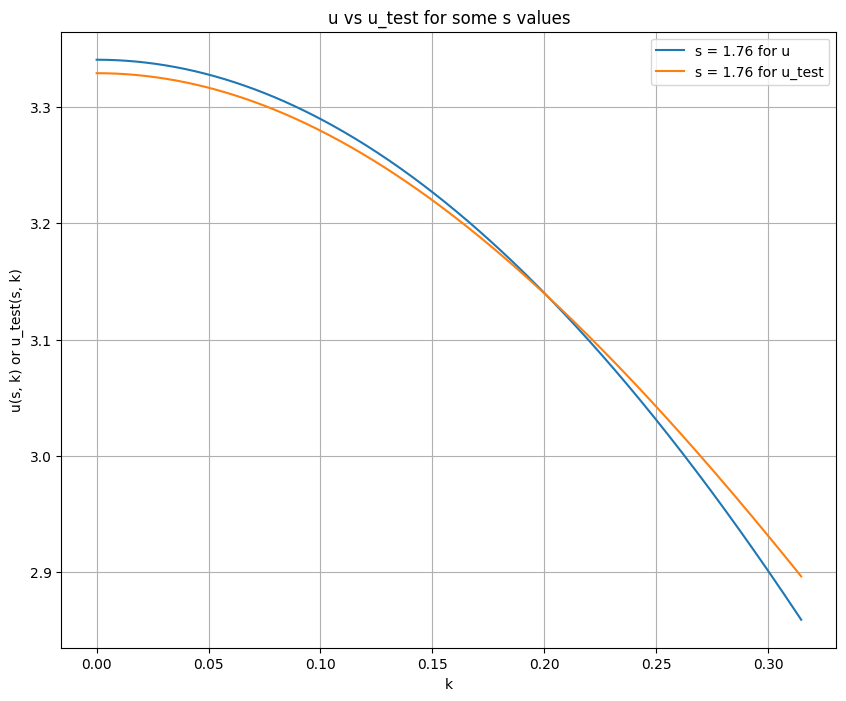

average difference for s = 1.78 : 0.011563406832272747


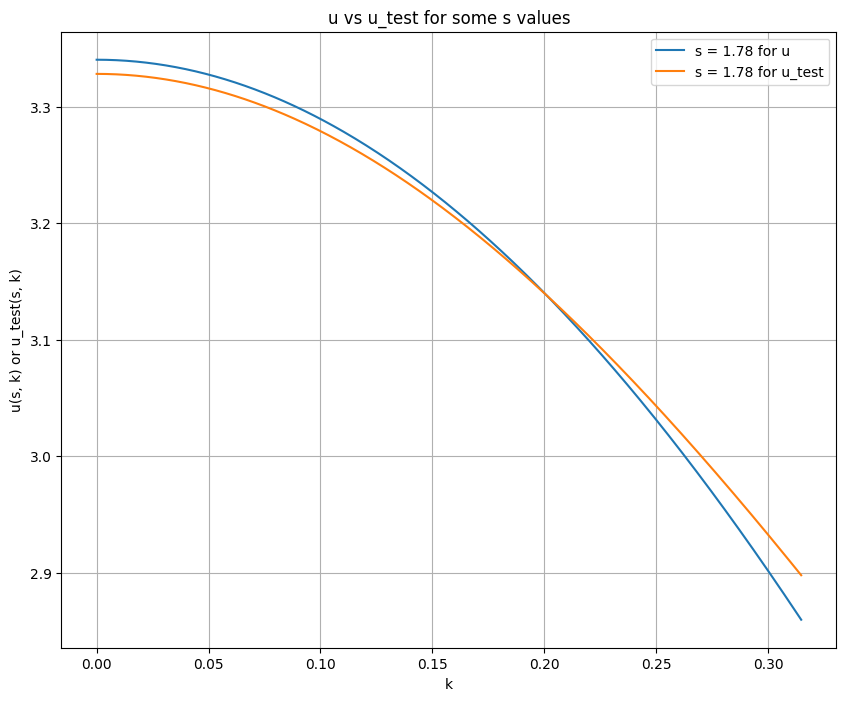

average difference for s = 1.80 : 0.011962529344934502


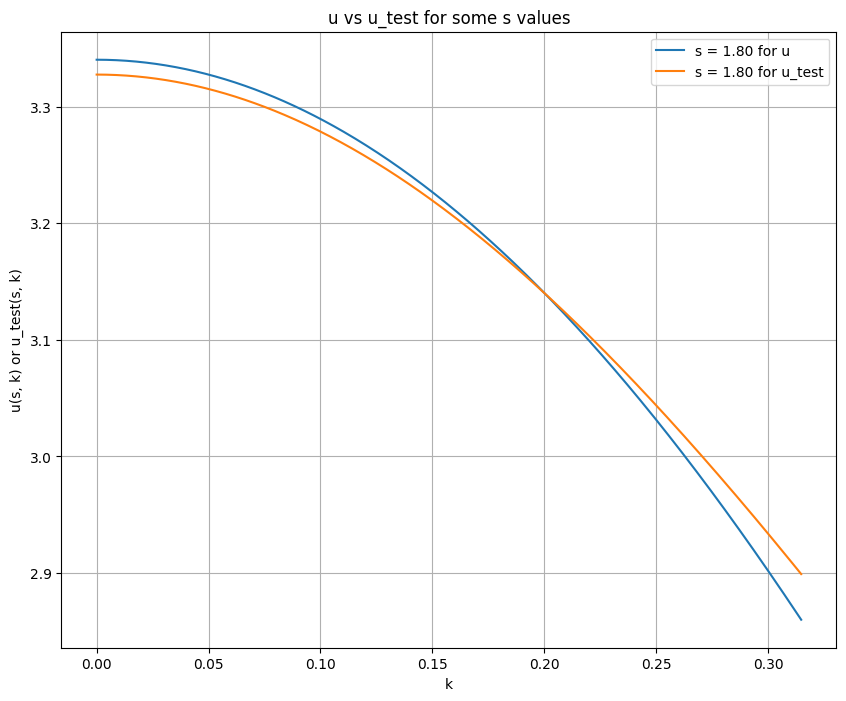

average difference for s = 1.82 : 0.01235550972615956


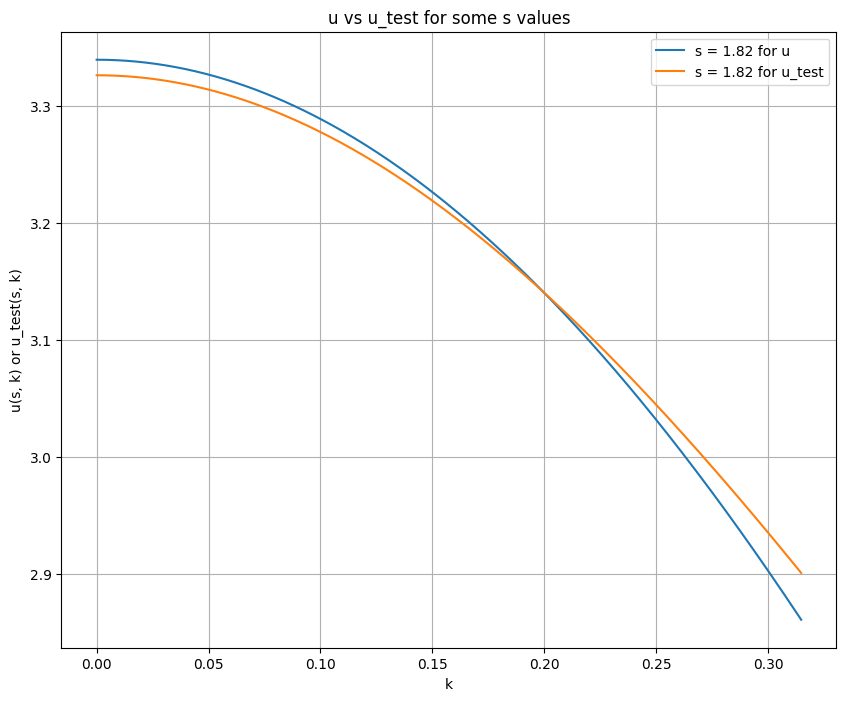

average difference for s = 1.84 : 0.01274251421385967


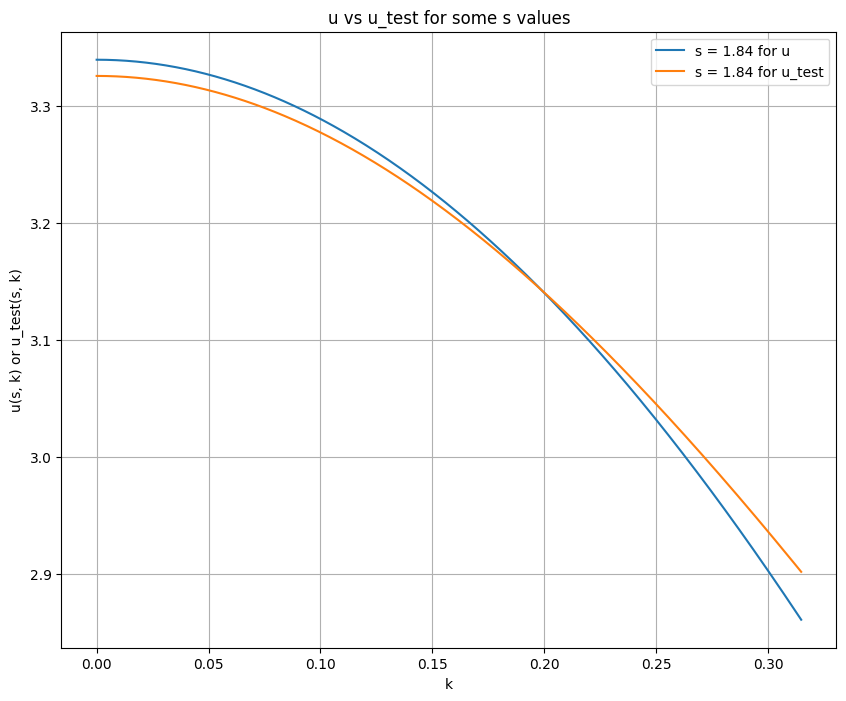

average difference for s = 1.86 : 0.013123642551447243


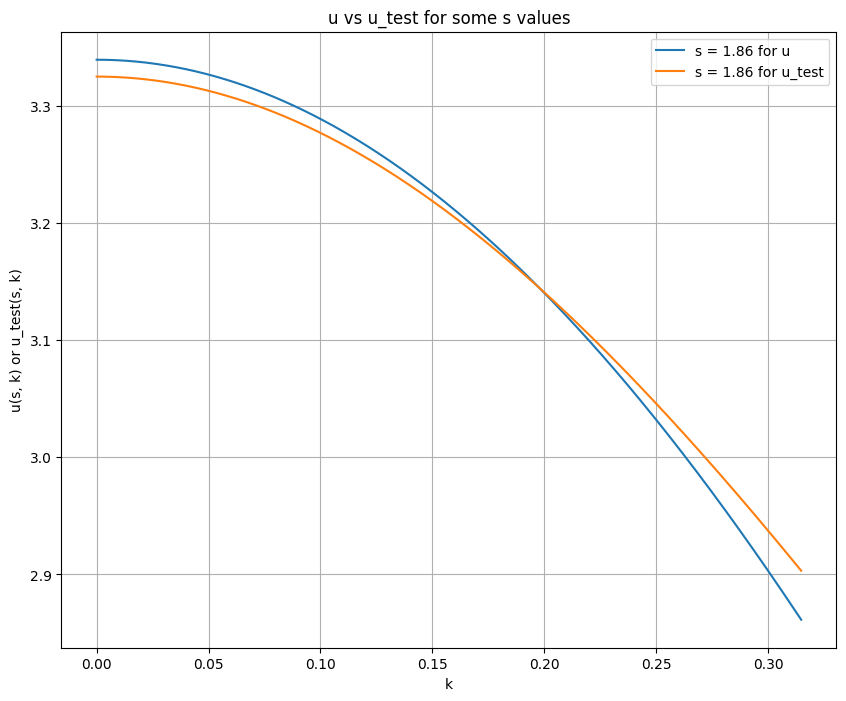

average difference for s = 1.88 : 0.013498937252536343


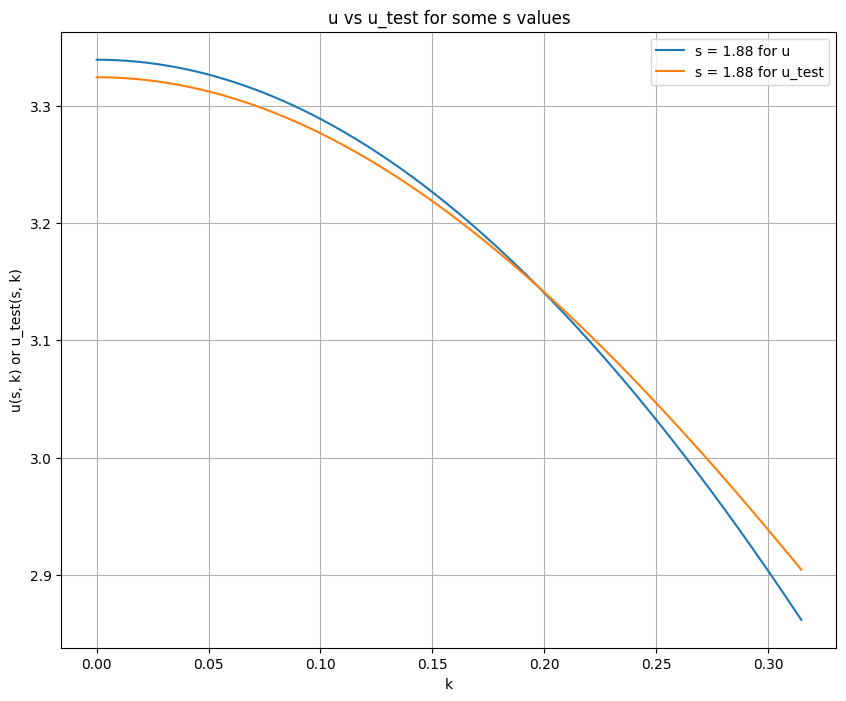

average difference for s = 1.90 : 0.0138685047054006


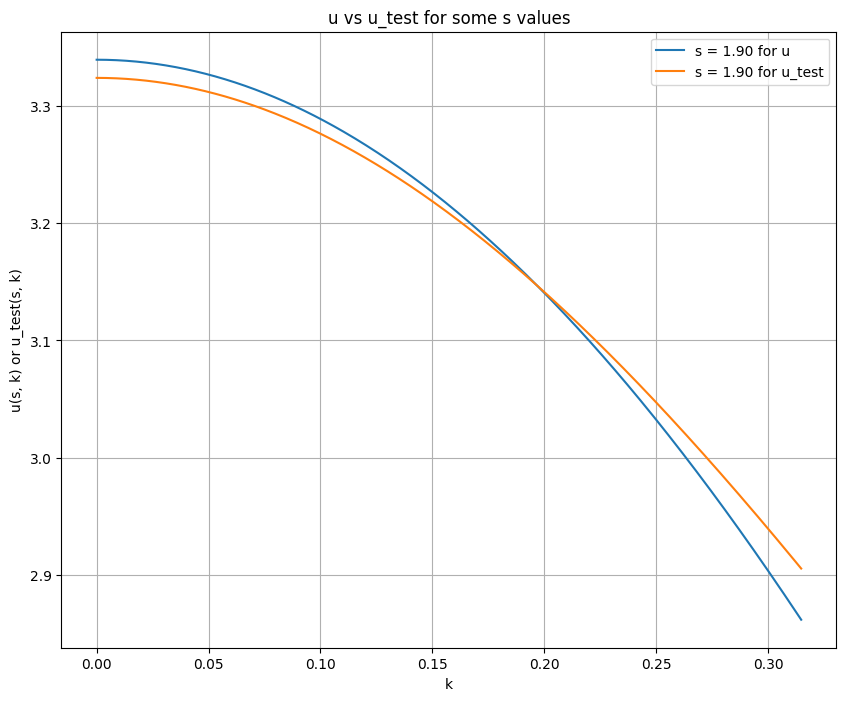

average difference for s = 1.92 : 0.014232446663212212


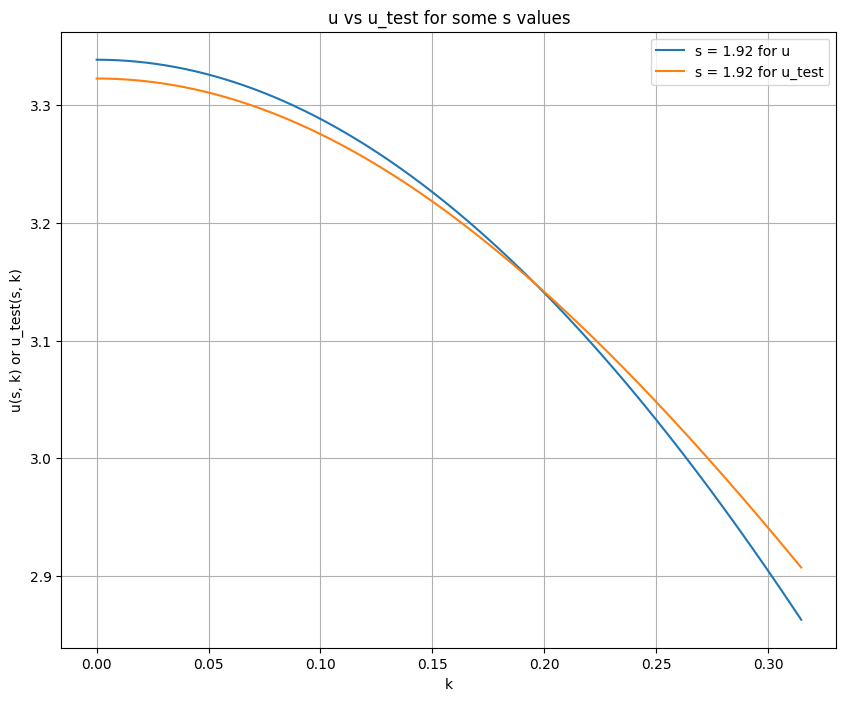

average difference for s = 1.94 : 0.014590860483599642


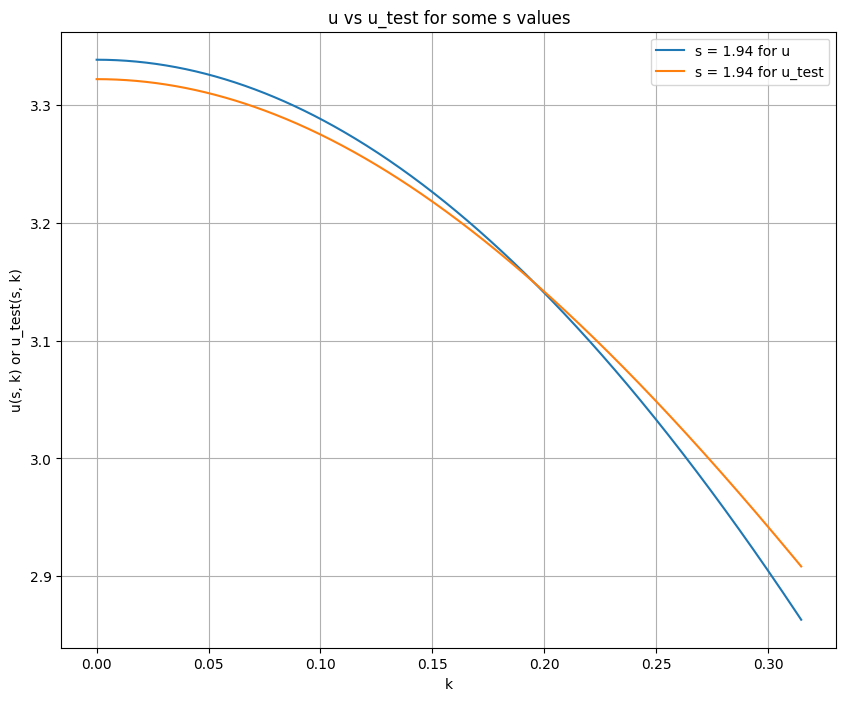

average difference for s = 1.96 : 0.014943879642897196


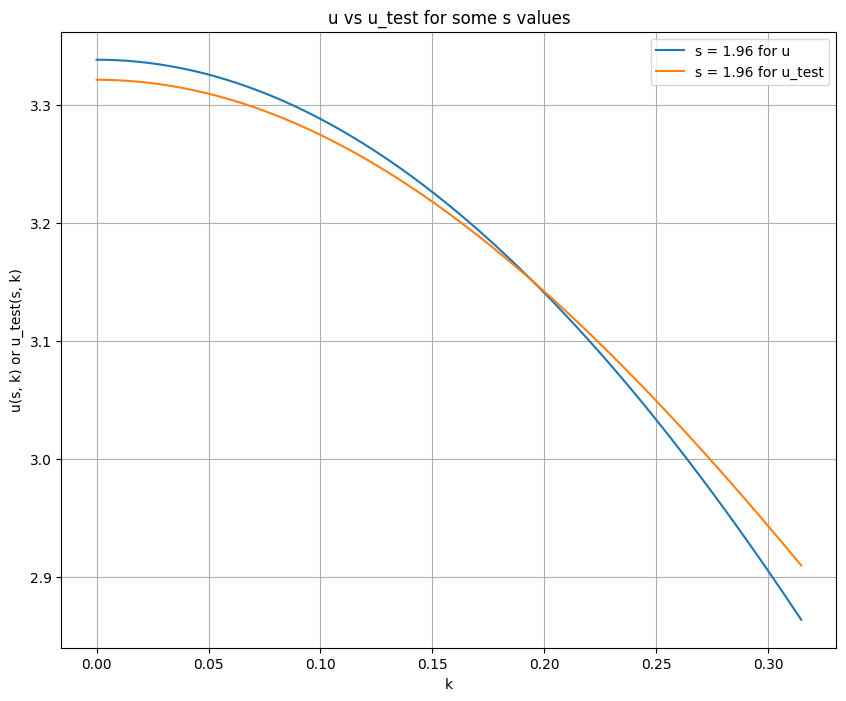

average difference for s = 1.98 : 0.015291645935453842


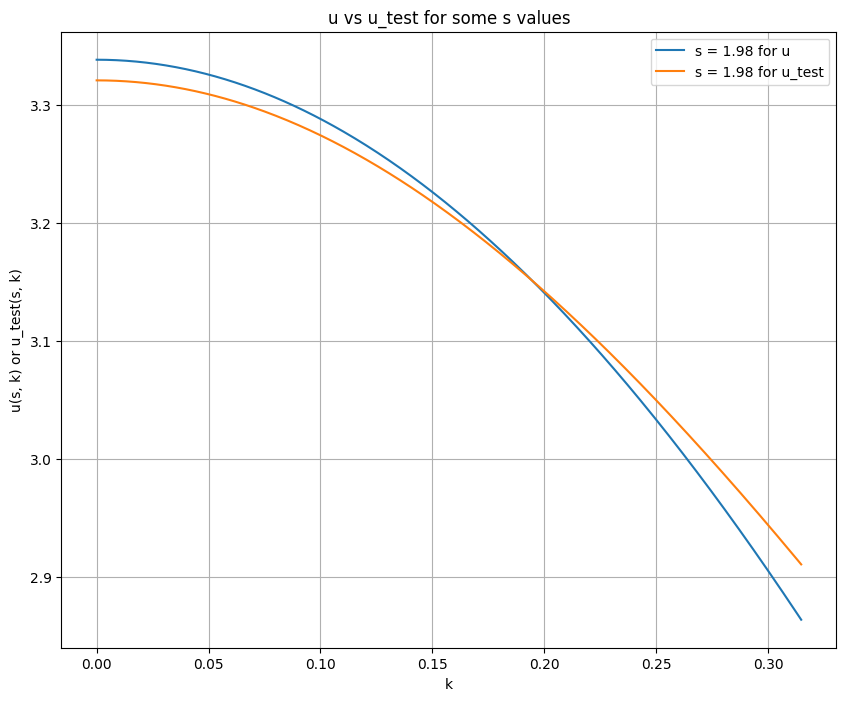

In [32]:
# compare u and u_test

for i in range(0, s_vals.shape[0], s_vals.shape[0]//50):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()